In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('../cnn_dailymail/train.csv')
test = pd.read_csv('../cnn_dailymail/test.csv')
validation = pd.read_csv('../cnn_dailymail/validation.csv')

In [4]:
train.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [5]:
print(train.shape)
print(test.shape)
print(validation.shape)

(287113, 3)
(11490, 3)
(13368, 3)


In [6]:
def print_row(n: int):
    print(train.iloc[n]['article'])
    print('\n')
    print(train.iloc[n]['highlights'])
print_row(1)

(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, authorities allege that the 45-year-old longtime officer worked with a drug trafficking organization to help plan a murder plot and get guns. A criminal complaint unsealed in U.S. District Court in New Jersey Tuesday accuses Mata, also known as "The Milk Man," of using his role as a police officer to help the drug trafficking organization in exchange for money and gifts, including a Rolex watch. In one instance, the complaint alleges, Mata arranged to pay two assassins to kill rival drug dealers. The killers would pose as cops, pulling over their targets before shooting them, according to the complaint. "Ultimately, the (organization) decided not to move forward with the murder plot, but Mata still received a payment for setting up the meetings," federal prosecutors said in a statement. The complain

In [7]:
train['words_in_highlights'] = train['highlights'].apply(lambda x: len(x.split()))
train['words_in_article'] = train['article'].apply(lambda x: len(x.split()))

In [8]:
import matplotlib.pyplot as plt

In [9]:
train.head()

,id,article,highlights,words_in_highlights,words_in_article
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",37,198
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,38,392
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",69,808
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,53,531
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,67,580


array([[<AxesSubplot:title={'center':'words_in_highlights'}>,
        <AxesSubplot:title={'center':'words_in_article'}>]], dtype=object)

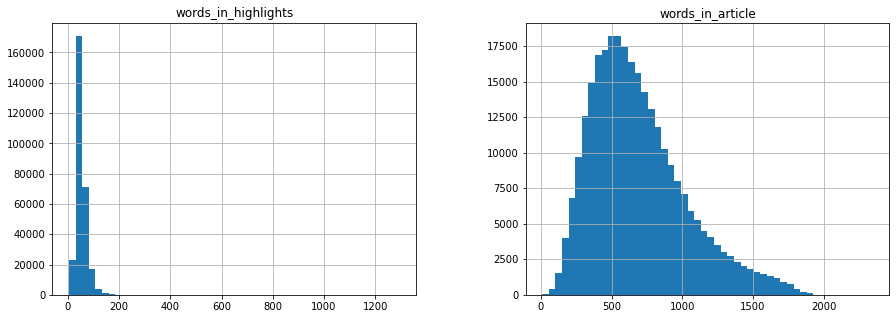

In [10]:
train[['words_in_highlights', 'words_in_article']].hist(bins=50, figsize=(15, 5))

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def clean_from_stopwords(text: str):
    return ' '.join([word for word in text.split() if word not in stopwords])

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenize(text: str):
    return word_tokenize(text)

def lemmatiser(text: str):
    wordnet_lemmatizer = WordNetLemmatizer()
    return ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])

In [16]:
train['clean_article'] = train['article'].apply(lambda x: lemmatiser( clean_from_stopwords( tokenize( remove_punctuation(x)))) )

AttributeError: 'list' object has no attribute 'split'